In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline


boston = load_boston()

bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)

bostonDF["PRICE"] = boston.target

print(bostonDF.shape)
bostonDF

(506, 14)


c:\Users\OPERATOR-70\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets includ

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(["PRICE"], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size= 0.3, random_state=156)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3F}'.format(mse,rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test,y_preds)))

print('절편 값:', lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_,4))

MSE : 17.297, RMSE : 4.159
Variance score : 0.757
절편 값: 40.995595172164435
회귀 계수값: [-1.13000e-01  6.55000e-02  3.44000e-02  3.04590e+00 -1.97958e+01
  3.35500e+00  5.90000e-03 -1.74190e+00  3.55900e-01 -1.43000e-02
 -9.20200e-01  1.04000e-02 -5.66200e-01]


In [14]:
X_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000
mean,3.512029,11.040960,11.143164,0.062147,0.557208,6.284517,69.057345,3.773437,9.677966,408.774011,18.440395,355.358446,12.722260
std,7.659321,23.400725,6.834845,0.241764,0.117595,0.730184,28.239313,2.076662,8.729048,169.875975,2.189268,89.680144,7.293552
min,0.009060,0.000000,0.460000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,2.600000,1.730000
25%,0.085418,0.000000,5.190000,0.000000,0.453000,5.887250,45.450000,2.066825,4.000000,279.000000,17.400000,372.597500,6.877500
50%,0.290225,0.000000,8.560000,0.000000,0.538000,6.198500,79.500000,3.267450,5.000000,330.000000,19.100000,390.800000,11.395000
75%,3.689388,12.500000,18.100000,0.000000,0.631000,6.628750,94.100000,5.213925,24.000000,666.000000,20.200000,395.580000,16.717500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,21.200000,396.900000,37.970000


In [15]:
from sklearn.preprocessing import RobustScaler

# 변형 객체 생성
robust_scaler = RobustScaler()

# 훈련데이터의 모수 분포 저장
robust_scaler.fit(X_train)

# 훈련 데이터 스케일링
X_train_scaled = robust_scaler.transform(X_train)

# 테스트 데이터의 스케일링
X_test_scaled = robust_scaler.transform(X_test)

# 스케일링 된 결과 값으로 본래 값을 구할 수도 있다.
# X_origin = robust_scaler.inverse_transform(X_train_scaled)

X_train_scaled = pd.DataFrame(data = X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(data = X_test_scaled, columns=X_test.columns)
y_train = pd.DataFrame(y_train)
y_train.reset_index(drop='index', inplace=True)
y_test = pd.DataFrame(y_test)
y_test.reset_index(drop='index', inplace=True)

C:\Users\OPERATOR-70\AppData\Local\Temp\ipykernel_13508\3722451924.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_scaled[col], bins=20, ax=ax[int(i/col_n),int(i%col_n)])
C:\Users\OPERATOR-70\AppData\Local\Temp\ipykernel_13508\3722451924.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dis

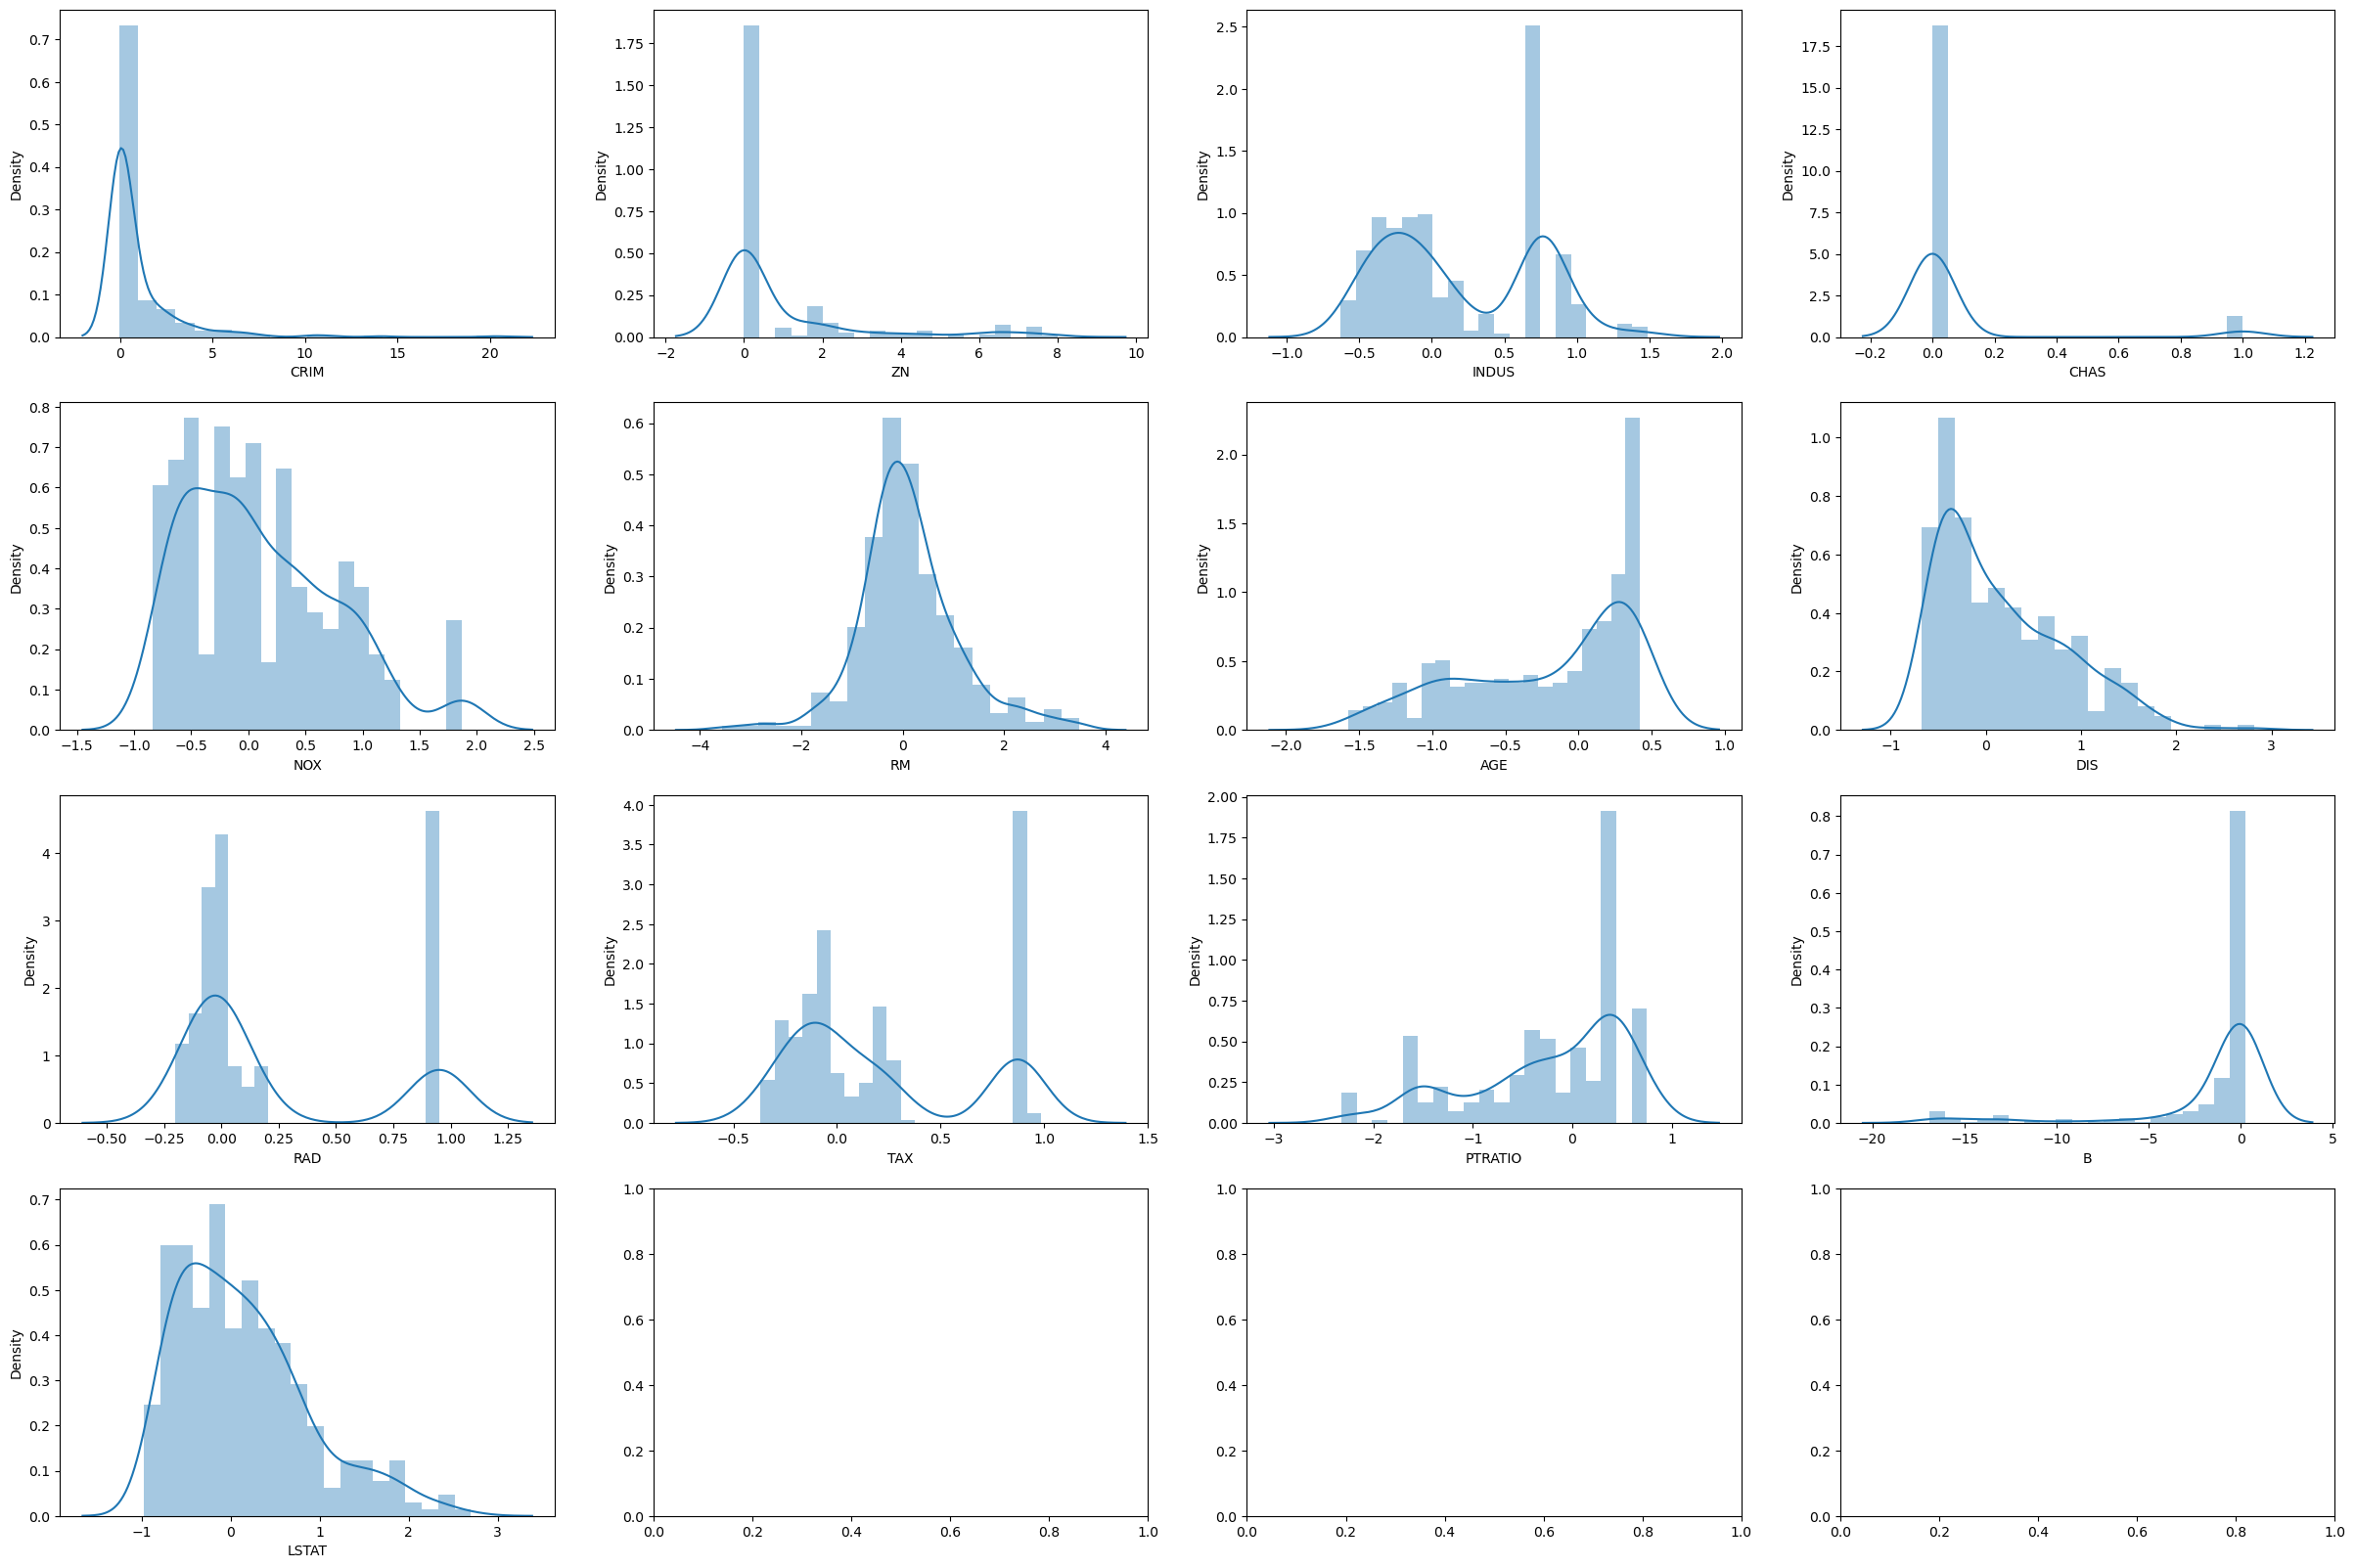

In [16]:
# histogram
col_n = 4
row_n = 4

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(30,row_n*5))

for i,col in enumerate(X_train_scaled.columns):
    sns.distplot(X_train_scaled[col], bins=20, ax=ax[int(i/col_n),int(i%col_n)])

CRIM
ZN
INDUS
CHAS
NOX
RM
AGE
DIS
RAD
TAX
PTRATIO
B
LSTAT


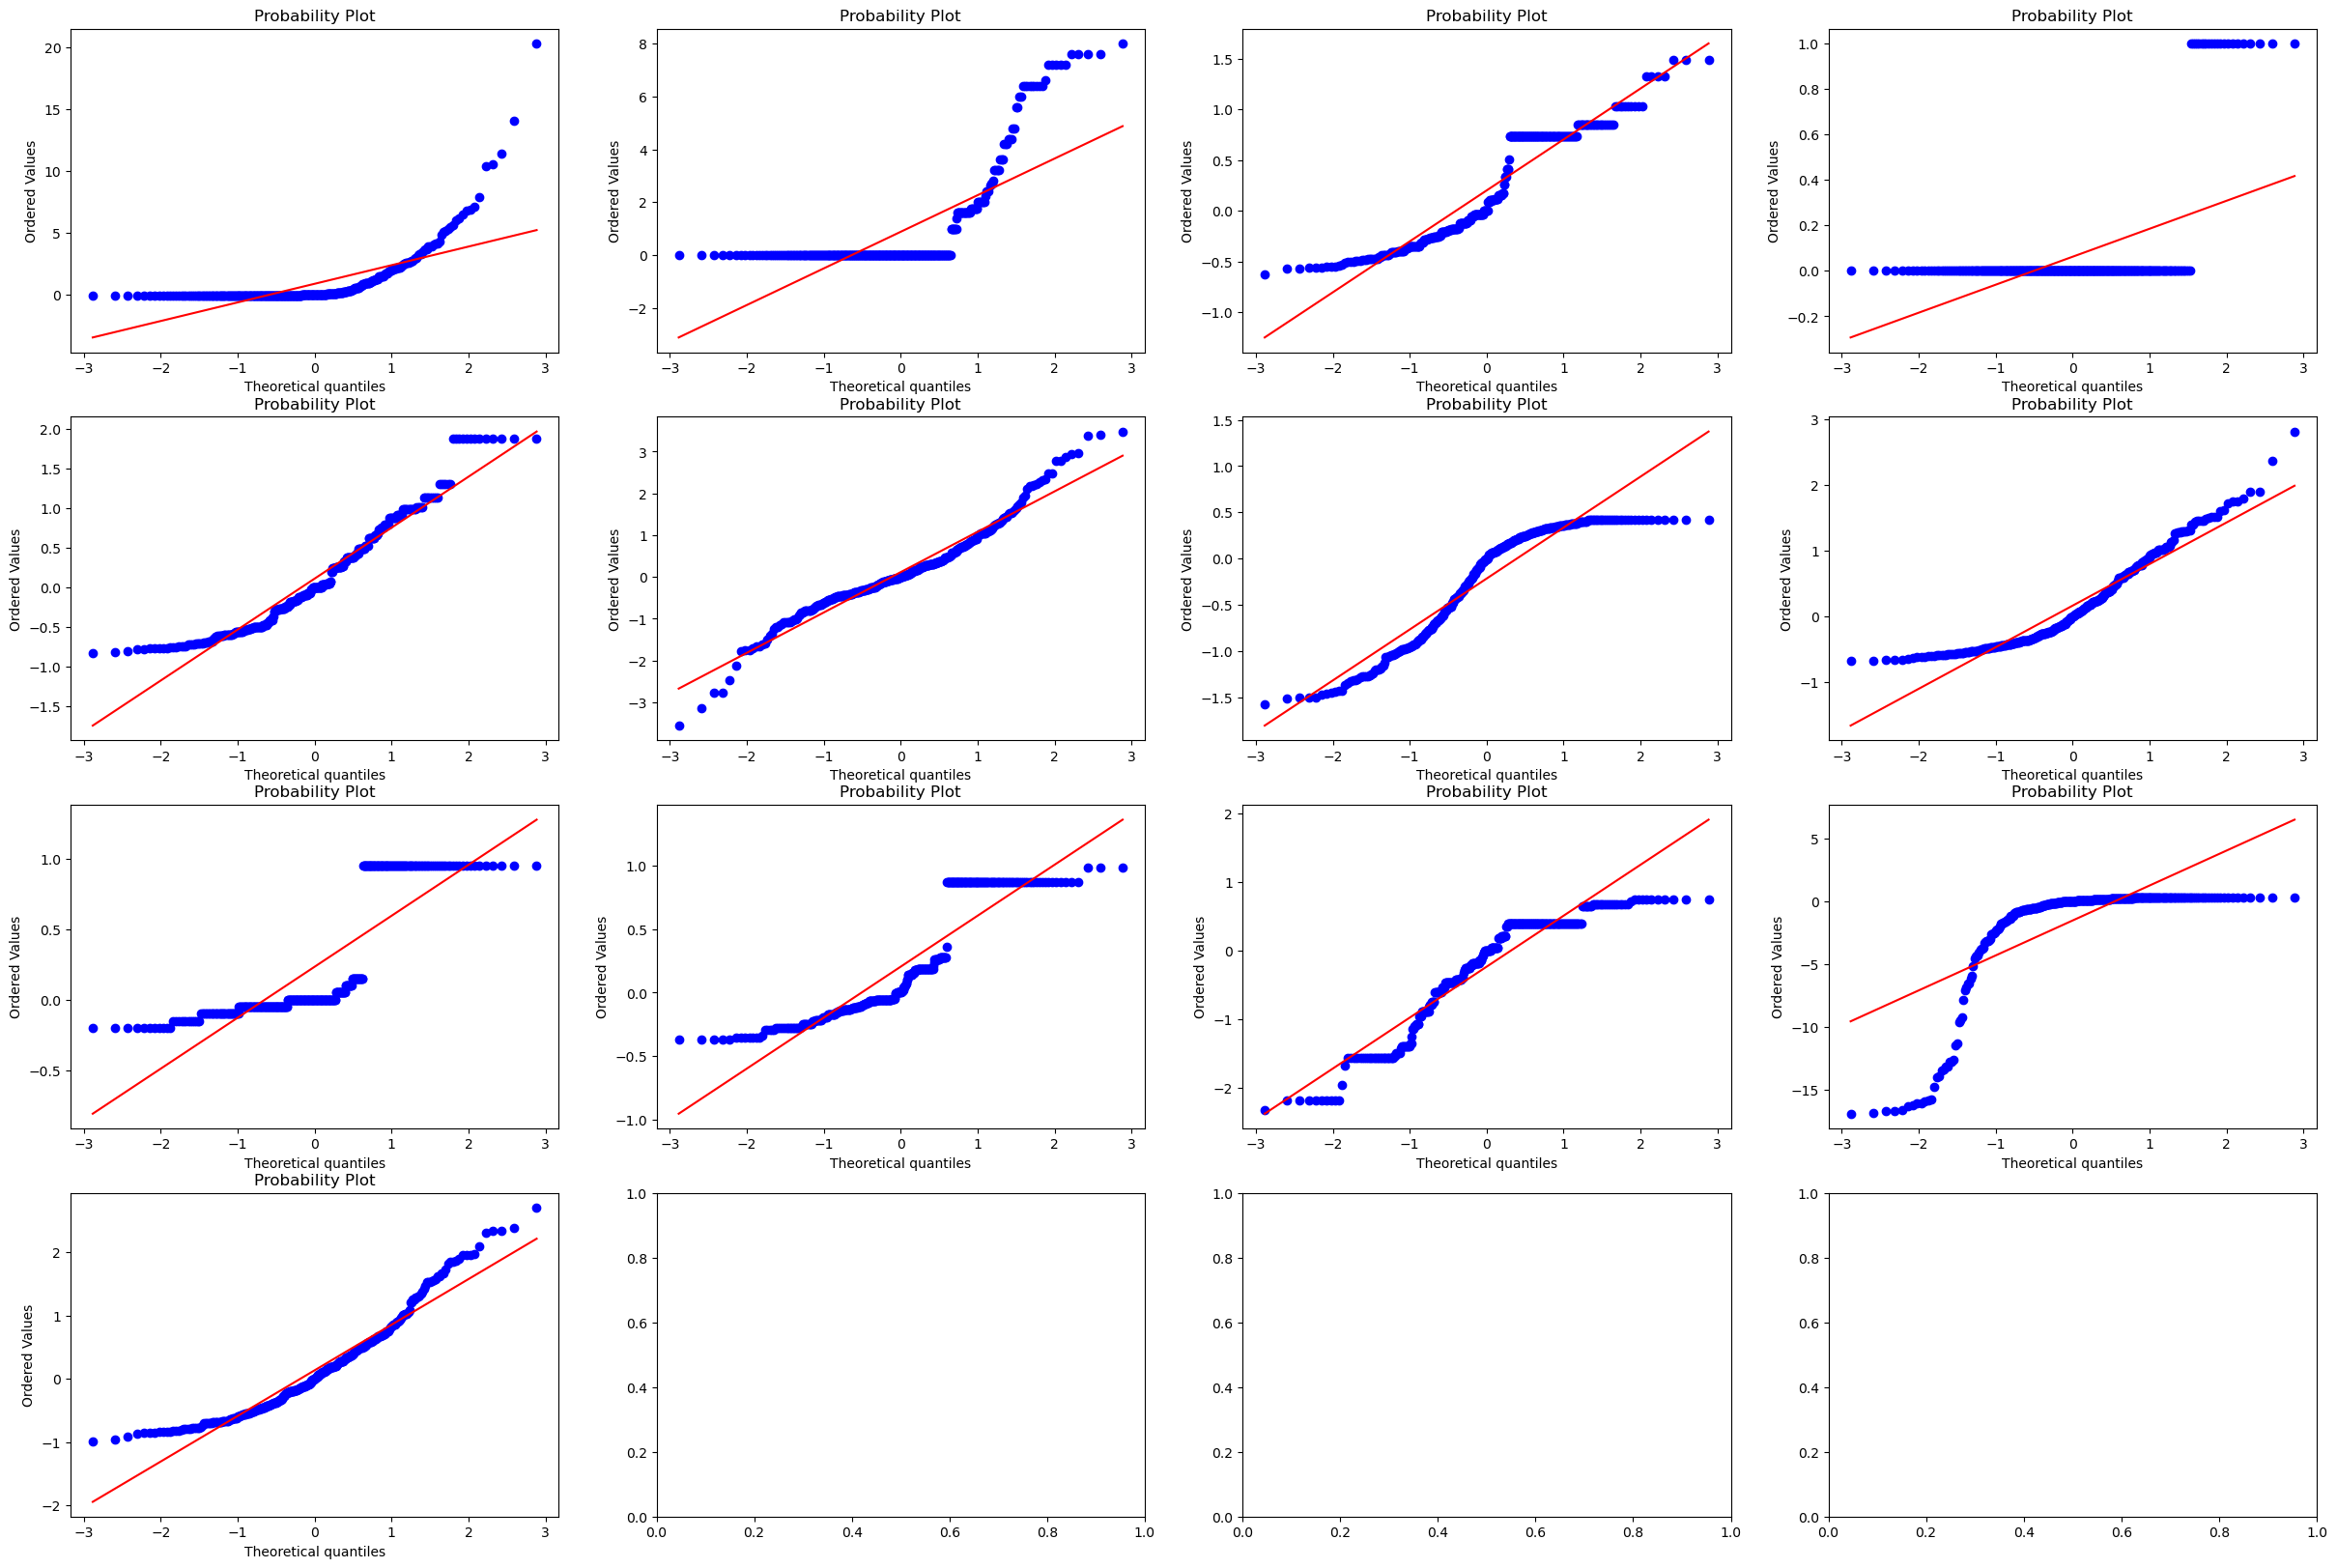

In [17]:
# histogram
col_n = 4
row_n = 4

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(30,row_n*5))

for i,col in enumerate(X_train_scaled.columns):
    stats.probplot(X_train_scaled[col],dist=stats.norm, plot=ax[int(i/col_n),int(i%col_n)])
    print(col)

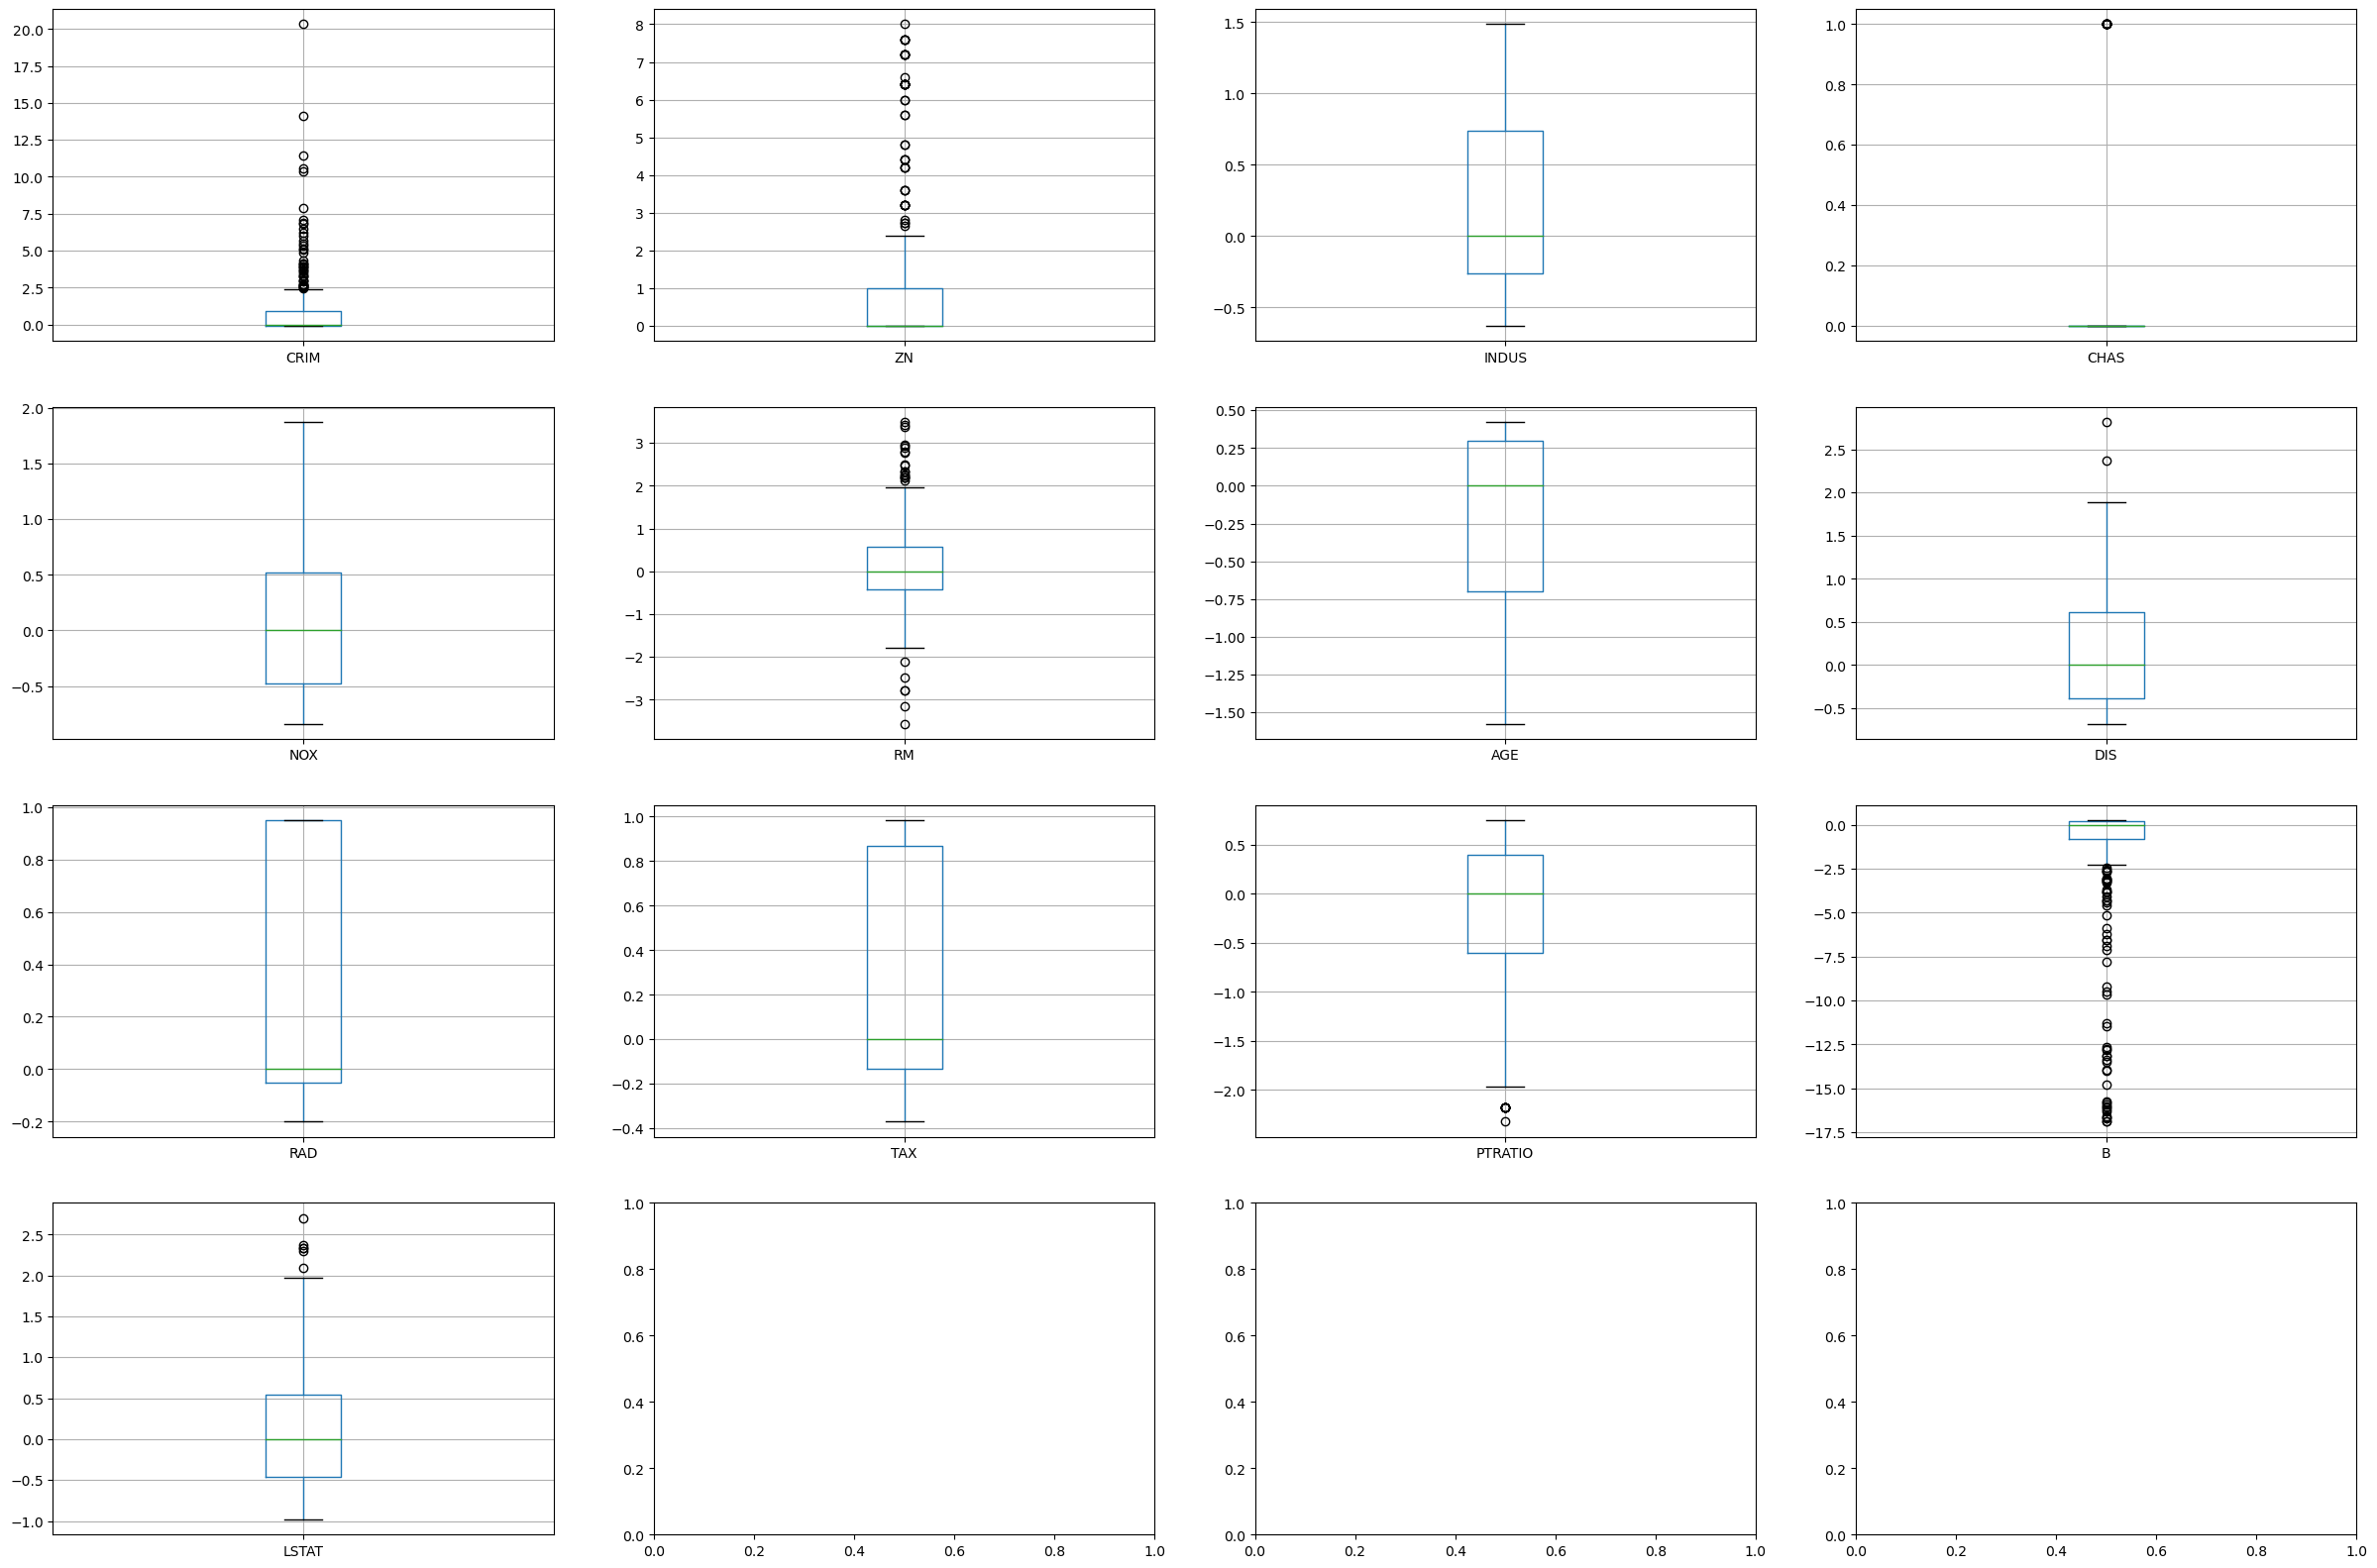

In [18]:
from matplotlib import rc 
col_n = 4
row_n = 4

# stats.probplot(df["대비_국고1년"], dist=stats.norm, plot=plt)
# plt.show()
fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(30,row_n*5))

for i,col in enumerate(X_train_scaled.columns):
    X_train_scaled.boxplot(column=col,ax=ax[int(i/col_n),int(i%col_n)])

In [19]:
import statsmodels.api as sm

feature_add = sm.add_constant(X_train_scaled,  has_constant='add')

# sm OLS 적합
model = sm.OLS(y_train , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     69.77
Date:                Fri, 11 Nov 2022   Prob (F-statistic):           1.42e-87
Time:                        16:16:15   Log-Likelihood:                -1068.0
No. Observations:                 354   AIC:                             2164.
Df Residuals:                     340   BIC:                             2218.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.2816      0.468     49.728      0.000      22.361      24.203
CRIM          -0.4072      0.184     -2.210      0.028      -0.770      -0.045
ZN             0.8189      0.215      3.804      0.000       0.395       1.242
INDUS          0.4446      1.056      0.421      0.674      -1.632       2.521
CHAS           3.0459      1.149      2.651      0.008       0.786       5.306
NOX           -3.5237      0.848     -4.153      0.000      -5.193      -1.855
RM             2.4877      0.376      6.618      0.000       1.748       3.227
AGE            0.2888      0.787      0.367      0.714      -1.260       1.838
DIS           -5.4818      0.790     -6.941      0.000      -7.035      -3.928
RAD            7.1177      1.715      4.151      0.000       3.745      10.490
TAX           -5.5323      1.905     -2.904      0.004      -9.279      -1.786
PTRATIO       -2.5765      0.472     -5.456      0.000      -3.505      -1.648
B              0.2389      0.081      2.937      0.004       0.079       0.399
LSTAT         -5.5712      0.591     -9.421      0.000      -6.734      -4.408
==============================================================================
Omnibus:                      110.816   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              364.560
Skew:                           1.390   Prob(JB):                     6.87e-80
Kurtosis:                       7.122   Cond. No.                         41.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# X_train_scaled = X_data

def feature_engineering_XbyVIF(X_train_scaled):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train_scaled.values,i)
                            for i in range(X_train_scaled.shape[1])]
    vif["Feature"] = X_train_scaled.columns
    return vif
vif = feature_engineering_XbyVIF(X_train_scaled)
print(vif)

    VIF_Factor  Feature
0     2.494209     CRIM
1     2.749318       ZN
2     4.253221    INDUS
3     1.123788     CHAS
4     4.477025      NOX
5     1.878344       RM
6     2.922469      AGE
7     3.751010      DIS
8     9.456281      RAD
9    11.659290      TAX
10    1.880308  PTRATIO
11    1.611522        B
12    2.637756    LSTAT


findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


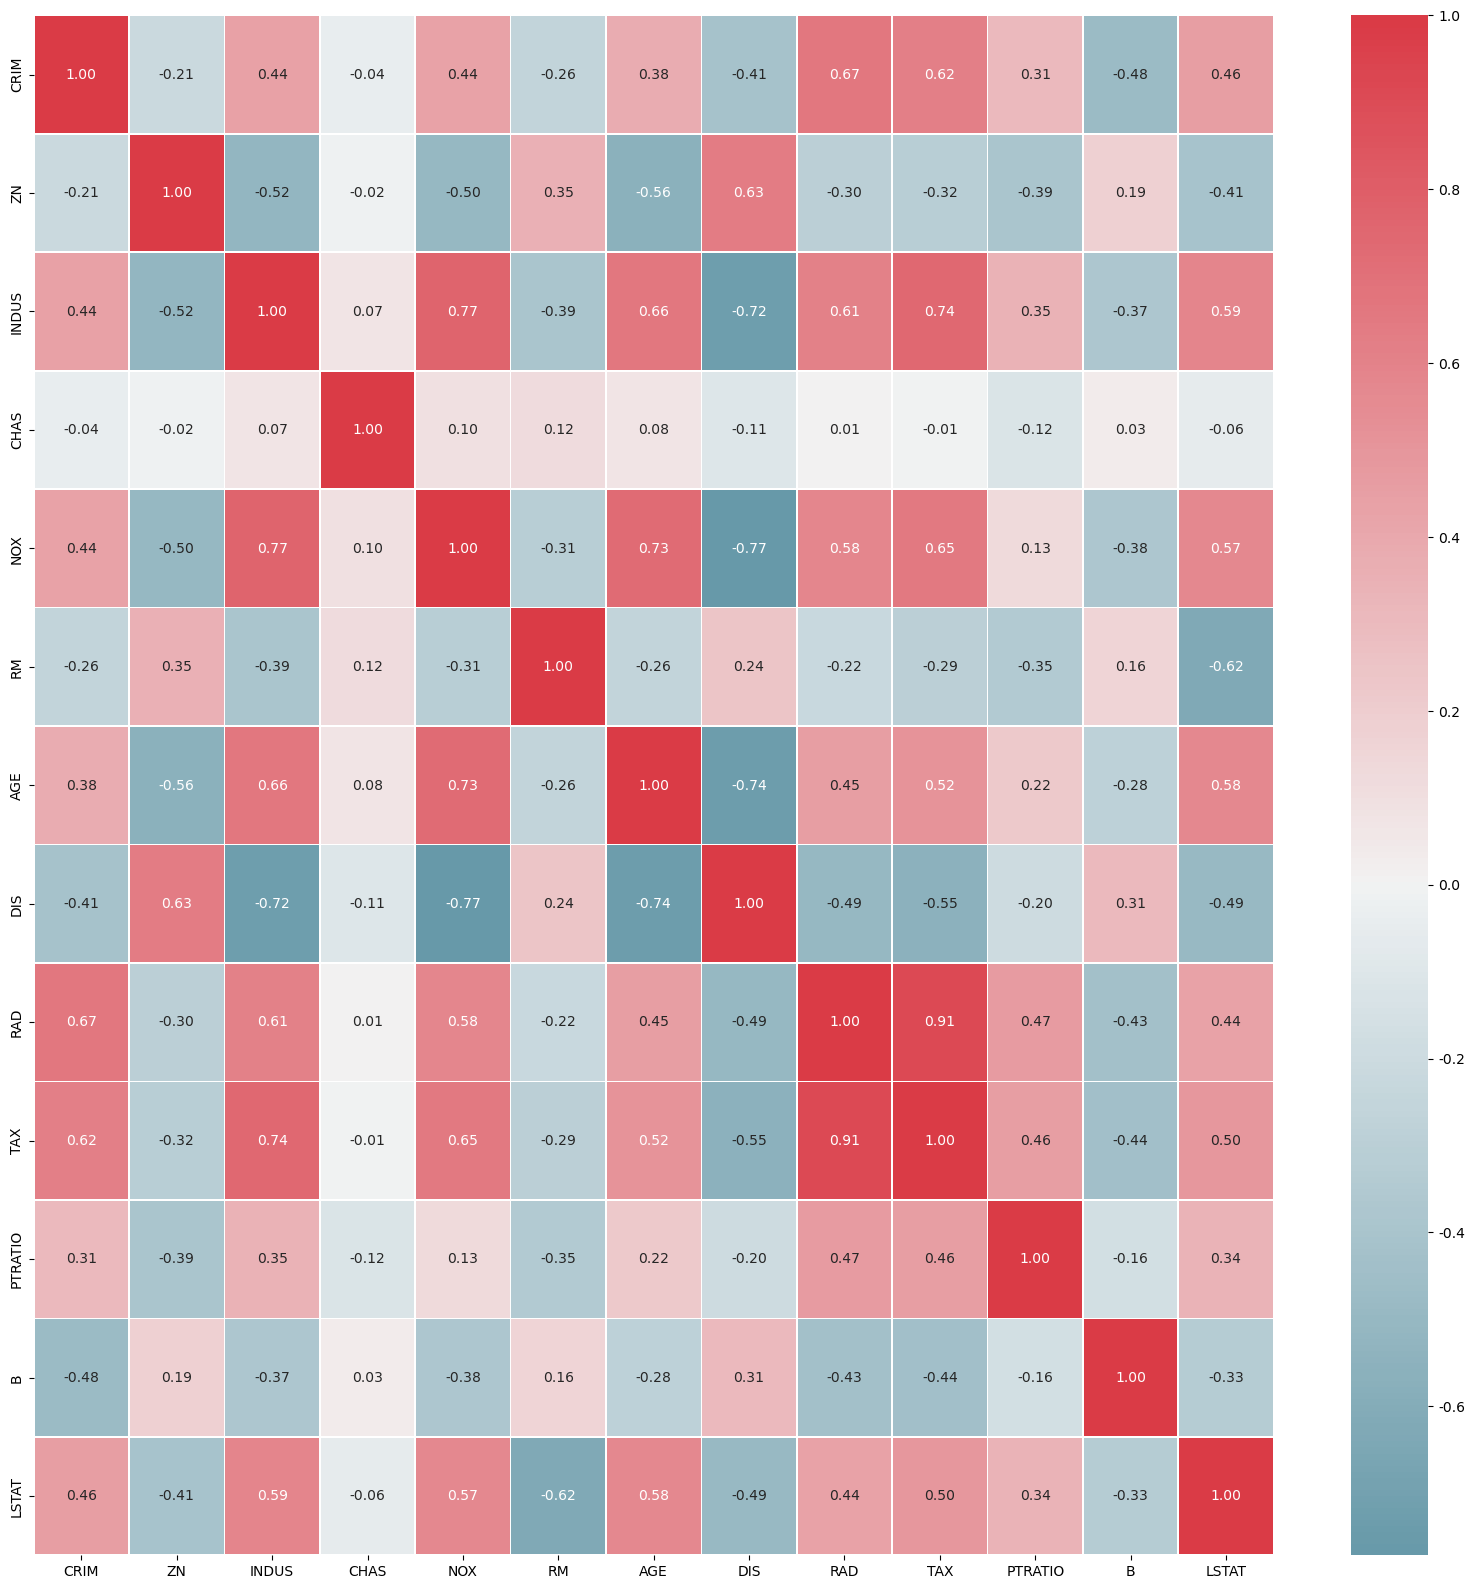

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns   
import scipy as sp  
from matplotlib import rc 
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(20,20))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(data = X_train_scaled.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap=cmap, center=0)

In [22]:
X_train_scaled.drop(['INDUS','AGE'], axis=1, inplace=True)

import statsmodels.api as sm

feature_add = sm.add_constant(X_train_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_train , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     82.83
Date:                Fri, 11 Nov 2022   Prob (F-statistic):           2.01e-89
Time:                        16:16:25   Log-Likelihood:                -1068.1
No. Observations:                 354   AIC:                             2160.
Df Residuals:                     342   BIC:                             2207.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.2981      0.407     57.277      0.000      22.498      24.098
CRIM          -0.4102      0.183     -2.236      0.026      -0.771      -0.049
ZN             0.7970      0.211      3.778      0.000       0.382       1.212
CHAS           3.1058      1.140      2.725      0.007       0.864       5.347
NOX           -3.3509      0.792     -4.233      0.000      -4.908      -1.794
RM             2.4998      0.368      6.801      0.000       1.777       3.223
DIS           -5.6335      0.742     -7.596      0.000      -7.092      -4.175
RAD            6.8878      1.643      4.191      0.000       3.655      10.120
TAX           -5.1323      1.682     -3.052      0.002      -8.440      -1.824
PTRATIO       -2.5503      0.468     -5.445      0.000      -3.472      -1.629
B              0.2390      0.081      2.952      0.003       0.080       0.398
LSTAT         -5.4838      0.563     -9.741      0.000      -6.591      -4.376
==============================================================================
Omnibus:                      112.572   Durbin-Watson:                   2.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              377.664
Skew:                           1.405   Prob(JB):                     9.80e-83
Kurtosis:                       7.208   Cond. No.                         37.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# X_train_scaled = X_data

def feature_engineering_XbyVIF(X_train_scaled):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train_scaled.values,i)
                            for i in range(X_train_scaled.shape[1])]
    vif["Feature"] = X_train_scaled.columns
    return vif
vif = feature_engineering_XbyVIF(X_train_scaled)
print(vif)

    VIF_Factor  Feature
0     2.490651     CRIM
1     2.642088       ZN
2     1.092234     CHAS
3     3.914420      NOX
4     1.839636       RM
5     3.208353      DIS
6     8.952527      RAD
7     9.190304      TAX
8     1.840676  PTRATIO
9     1.591207        B
10    2.430096    LSTAT


In [25]:
X_train_scaled.columns
X_test_scaled= X_test_scaled[['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B',
       'LSTAT']]

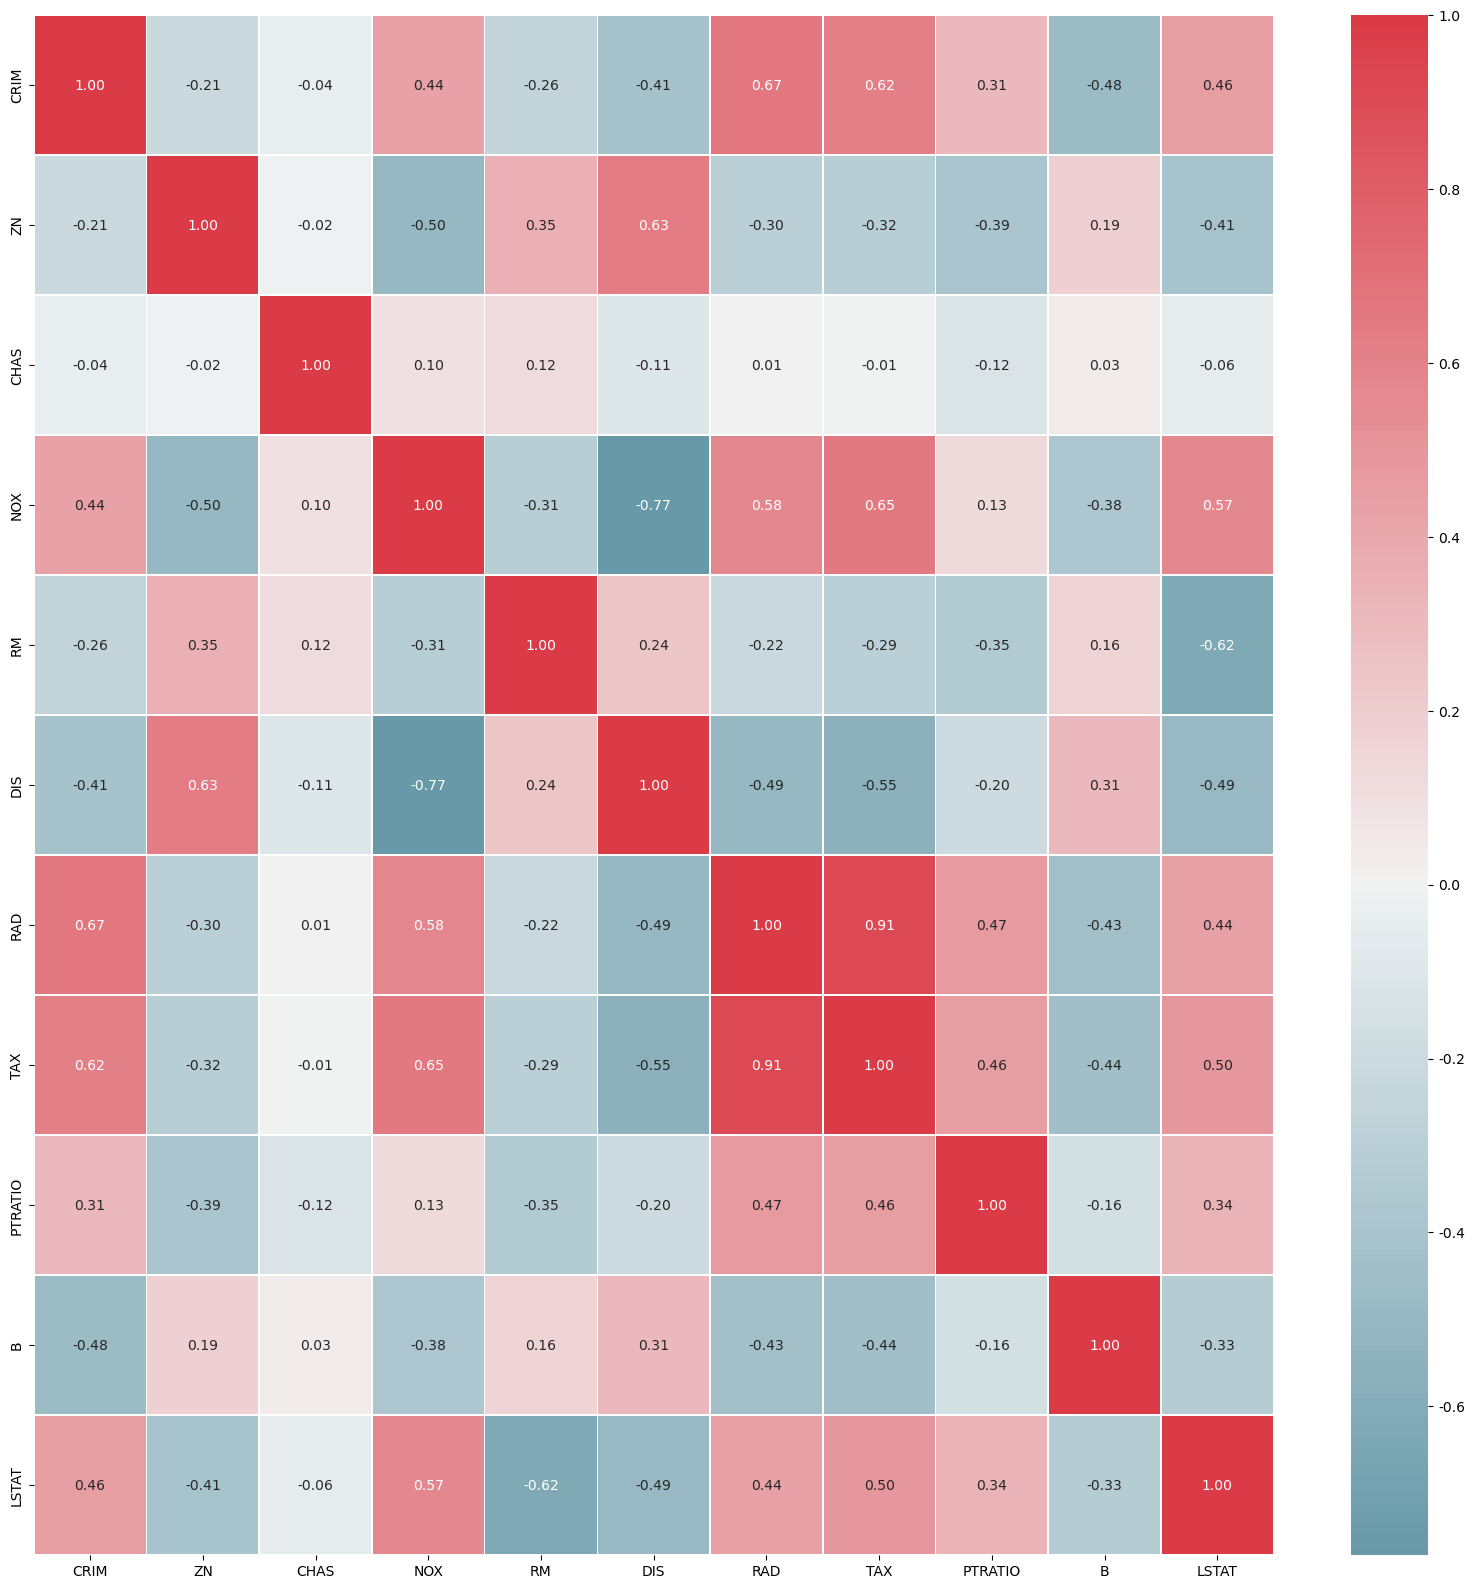

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns   
import scipy as sp  
from matplotlib import rc 
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(20,20))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(data = X_train_scaled.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap=cmap, center=0)

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_preds = lr.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3F}'.format(mse,rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test,y_preds)))

print('절편 값:', lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_,4))

MSE : 17.227, RMSE : 4.151
Variance score : 0.758
절편 값: [23.29805227]
회귀 계수값: [[-0.4102  0.797   3.1058 -3.3509  2.4998 -5.6335  6.8878 -5.1323 -2.5503
   0.239  -5.4838]]
